<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_%EC%9D%B4%ED%8C%A8%EC%8A%A4_%EC%98%88%EC%83%81%EB%AC%B8%EC%A0%9C_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#유형 1

In [1]:
import sklearn as sk
import pandas as pd

In [2]:
import sklearn.preprocessing as sk_pre
import sklearn.metrics as sk_met
import sklearn.model_selection as sk_mod

In [3]:
import seaborn as sns
import tensorflow as tf

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#유형2


In [6]:
df = pd.read_csv('datasets/auto_mpg.csv')

In [7]:
df.to_csv('datasets/auto_mpg_clean.csv', index=False)

In [8]:
df_excel = pd.read_excel('datasets/auto_mpg.xlsx') #xlsx 파일 없어서 오류

In [9]:
df.to_json('datasets/auto_mpg.json', orient='records')

In [10]:
df.to_pickle('datasets/auto_mpg.pkl')

#유형3

In [11]:
df1 = df[['model_year','mpg','cylinders','displacement']]
df2 = df[['model_year','horsepower','weight','acceleration']]
df_merge = pd.merge(df1, df2, how='inner', on='model_year')

In [12]:
df1 = df[['origin','mpg','cylinders']]
df2 = df[['origin','horsepower','weight']]
df_merge = pd.merge(df1, df2, how='outer', on='origin')

In [13]:
df1 = df[['mpg','cylinders','displacement']]
df2 = df[['horsepower','weight','acceleration']]
df_concat = pd.concat([df1, df2], axis=0)

In [14]:
df1 = df[['mpg','cylinders','displacement']]
df2 = df[['horsepower','weight','acceleration']]
df_concat_col = pd.concat([df1, df2], axis=1)

In [15]:
df1 = df[['horsepower','mpg','cylinders']]
df2 = df[['horsepower','weight','acceleration']]
df_left = pd.merge(df1, df2, how='left', on='horsepower')

#유형4

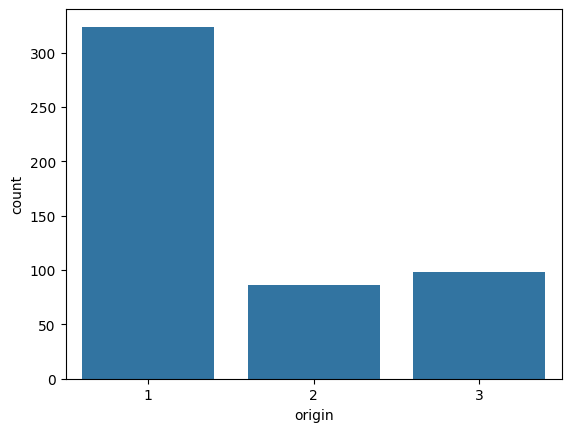

In [16]:
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(data=df, x='origin')
plt.show()

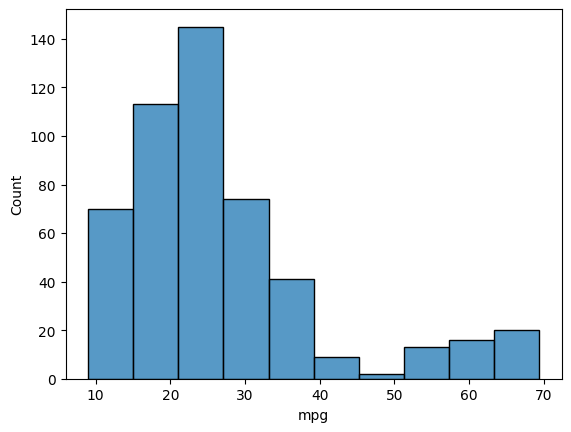

In [17]:
sns.histplot(data=df, x='mpg', bins=10)
plt.show()

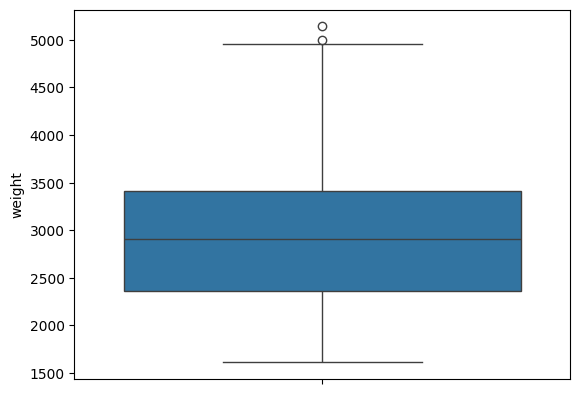

In [18]:
plt.figure()
sns.boxplot(data=df, y='weight')
plt.show()

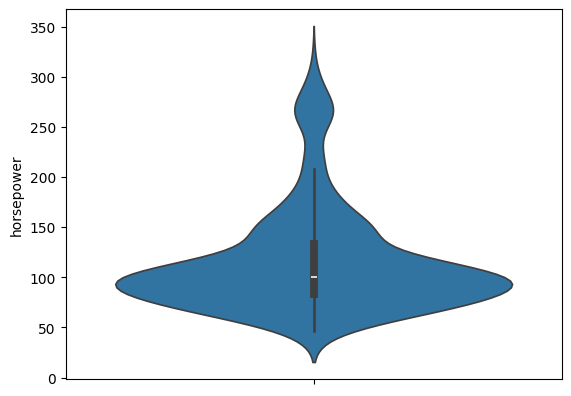

In [19]:
plt.figure()
sns.violinplot(data=df, y='horsepower')
plt.show()

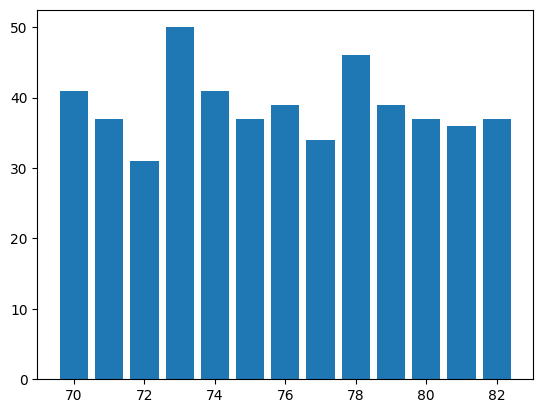

In [20]:
plt.bar(x=df['model_year'].value_counts().index, height = df['model_year'].value_counts())
plt.show()

<Axes: xlabel='model_year'>

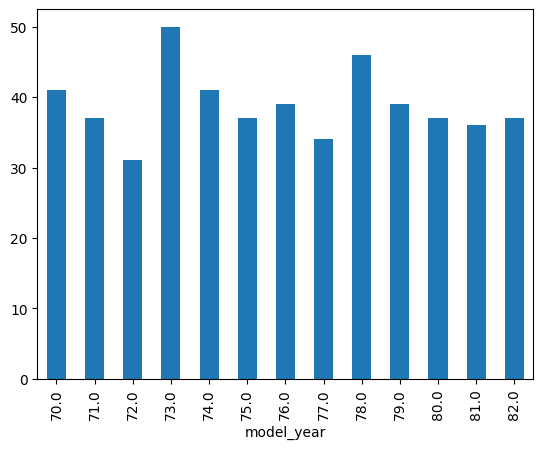

In [21]:
df['model_year'].value_counts().sort_index().plot(kind='bar')

#유형5

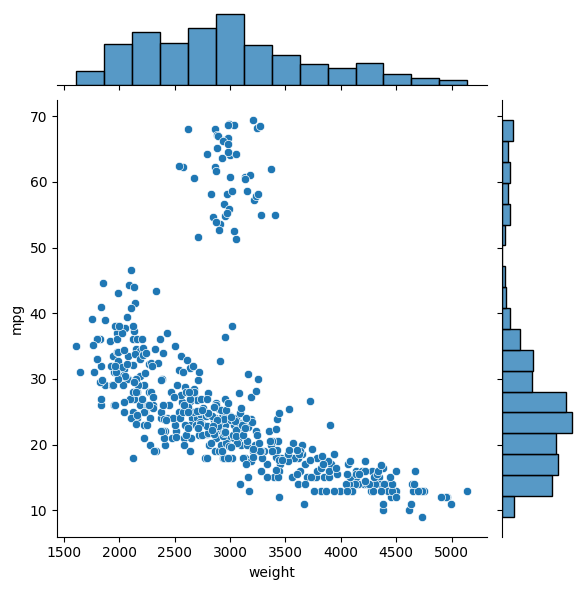

In [22]:
sns.jointplot(data=df, x='weight', y='mpg')

<Figure size 640x480 with 0 Axes>

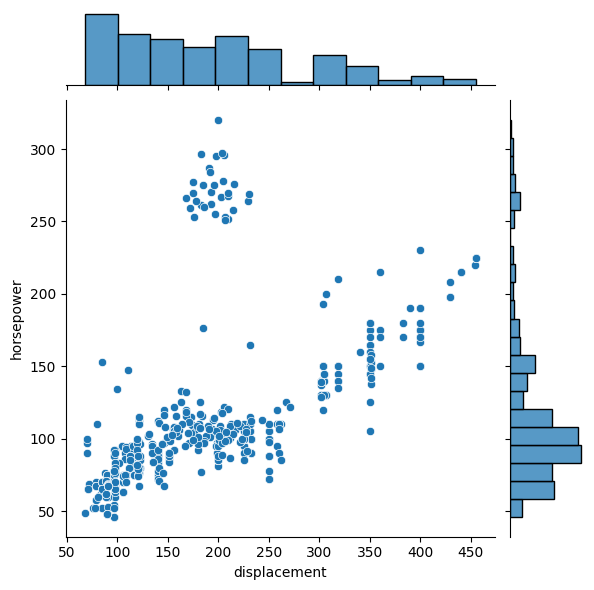

In [23]:
plt.figure()
sns.jointplot(data=df, x='displacement', y='horsepower')
plt.show()

<Figure size 640x480 with 0 Axes>

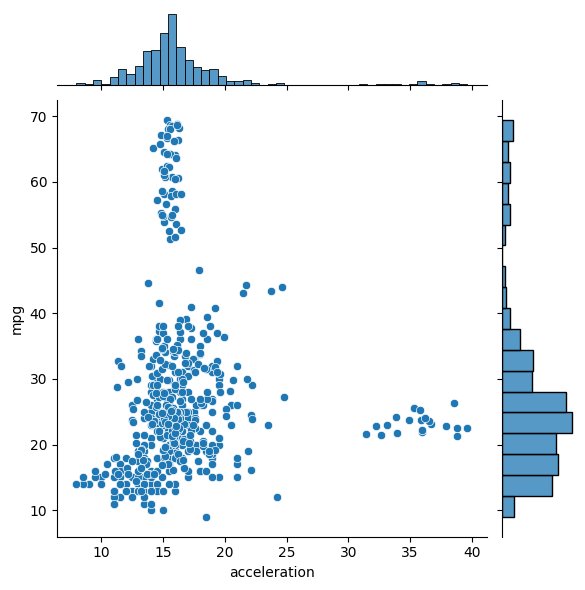

In [24]:
plt.figure()
sns.jointplot(data=df, x='acceleration', y='mpg')
plt.show()

<Figure size 640x480 with 0 Axes>

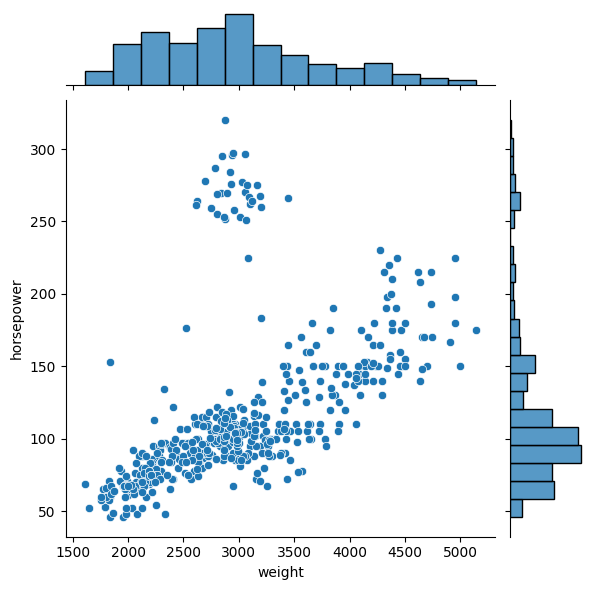

In [25]:
plt.figure()
sns.jointplot(data=df, x='weight',y='horsepower')
plt.show()

<Figure size 640x480 with 0 Axes>

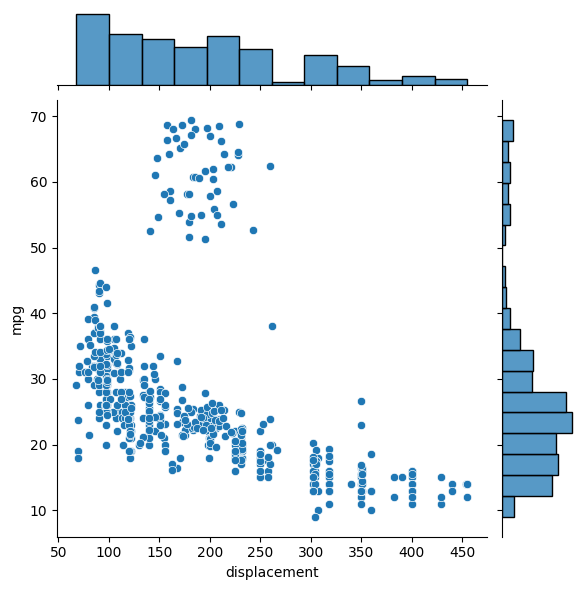

In [26]:
plt.figure()
sns.jointplot(data=df, x='displacement', y='mpg')
plt.show()

#유형6

In [27]:
df[df['mpg'] <= 50]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
498,23.11,6.0,253.07,NaN,2151.01,14.08,75.0,1,missing model 899
499,26.47,NaN,NaN,NaN,2039.42,NaN,72.0,1,missing model 811
502,15.49,6.0,NaN,133.37,3599.71,10.34,NaN,1,missing model 300
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861


In [28]:
drop_index = df[df['horsepower']>250].index
df.drop(drop_index)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,missing model 687
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,missing model 921
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,missing model 715


In [29]:
df[df['acceleration'] <= 30]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8.0,307.0,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu
1,15.00,8.0,350.0,165.00,3693.00,11.50,70.0,1,buick skylark 320
2,18.00,8.0,318.0,150.00,3436.00,11.00,70.0,1,plymouth satellite
3,16.00,8.0,304.0,150.00,3433.00,12.00,70.0,1,amc rebel sst
4,17.00,8.0,302.0,140.00,3449.00,10.50,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
502,15.49,6.0,NaN,133.37,3599.71,10.34,NaN,1,missing model 300
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,missing model 687
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,missing model 921
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861


In [30]:
q1, q3 = df['horsepower'].quantile(0.25), df['horsepower'].quantile(0.75)
IQR = q3-q3

drop_index = df[(df['horsepower'] < q1-IQR*1.5) | (df['horsepower'] > q3+IQR*1.5)].index
print(len(drop_index))
df.drop(drop_index)

254


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu
14,24.00,4.0,113.00,95.00,2372.00,15.00,70.0,3,toyota corona mark ii
15,22.00,6.0,198.00,95.00,2833.00,15.50,70.0,1,plymouth duster
16,18.00,6.0,199.00,97.00,2774.00,15.50,70.0,1,amc hornet
17,21.00,6.0,200.00,85.00,2587.00,16.00,70.0,1,ford maverick
...,...,...,...,...,...,...,...,...,...
497,54.99,6.0,191.03,106.39,3405.69,14.96,78.0,2,eco model 470
498,23.11,6.0,253.07,NaN,2151.01,14.08,75.0,1,missing model 899
499,26.47,NaN,NaN,NaN,2039.42,NaN,72.0,1,missing model 811
500,NaN,NaN,271.14,121.63,2409.97,NaN,70.0,1,missing model 911


In [31]:
df['z-score'] = (df['acceleration']-df['acceleration'].mean())/df['acceleration'].std()
drop_index = df[abs(df['z-score'])>3].index
df.drop(drop_index)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino,-1.255008
...,...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,missing model 687,1.241895
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,missing model 921,-0.801606
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861,1.669753
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,missing model 715,NaN


#유형7

In [32]:
df.shape

(508, 10)

In [33]:
df.dropna(axis=0, how='any')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino,-1.255008
...,...,...,...,...,...,...,...,...,...,...
493,66.25,4.0,211.20,86.67,2931.49,15.91,81.0,1,eco model 739,-0.103410
494,55.27,4.0,169.96,103.97,2969.30,14.84,81.0,1,eco model 276,-0.331175
495,65.83,4.0,174.51,99.42,2983.70,14.75,72.0,2,eco model 788,-0.350333
496,61.59,8.0,195.72,114.15,2872.48,15.07,74.0,1,eco model 534,-0.282216


In [34]:
df.dropna(subset=['horsepower'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino,-1.255008
...,...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,missing model 687,1.241895
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,missing model 921,-0.801606
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861,1.669753
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,missing model 715,NaN


In [35]:
df.dropna(axis=1, how='any')

,origin,name
0,1,chevrolet chevelle malibu
1,1,buick skylark 320
2,1,plymouth satellite
3,1,amc rebel sst
4,1,ford torino
...,...,...
503,1,missing model 687
504,1,missing model 921
505,1,missing model 861
506,3,missing model 715


In [36]:
df.fillna(0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino,-1.255008
...,...,...,...,...,...,...,...,...,...,...
503,0.00,8.0,0.00,159.86,3645.17,22.23,71.0,1,missing model 687,1.241895
504,0.00,0.0,0.00,183.61,3201.03,12.63,76.0,1,missing model 921,-0.801606
505,12.07,6.0,0.00,126.84,3443.07,24.24,74.0,1,missing model 861,1.669753
506,0.00,0.0,110.29,147.59,3541.82,0.00,0.0,3,missing model 715,0.000000


In [37]:
df['horsepower'].fillna(df['horsepower'].mean())

,horsepower
0,130.00
1,165.00
2,150.00
3,150.00
4,140.00
...,...
503,159.86
504,183.61
505,126.84
506,147.59


#유형8

In [38]:
df.drop(['name'], axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,-1.255008
...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,1.241895
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,-0.801606
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,1.669753
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,NaN


In [39]:
df.drop(['model_year','origin'],axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,name,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,chevrolet chevelle malibu,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,buick skylark 320,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,plymouth satellite,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,amc rebel sst,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,ford torino,-1.255008
...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,missing model 687,1.241895
504,NaN,NaN,NaN,183.61,3201.03,12.63,missing model 921,-0.801606
505,12.07,6.0,NaN,126.84,3443.07,24.24,missing model 861,1.669753
506,NaN,NaN,110.29,147.59,3541.82,NaN,missing model 715,NaN


In [40]:
df.drop(df.select_dtypes('O').columns, axis=1)
df.select_dtypes(exclude=['O'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,z-score
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,-0.935711
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,-1.042144
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,-1.148576
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,-0.935711
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,-1.255008
...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,1.241895
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,-0.801606
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,1.669753
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,NaN


In [41]:
df.drop(df.select_dtypes(['int','float']), axis=1)
df.select_dtypes(exclude=['number'])

,name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
503,missing model 687
504,missing model 921
505,missing model 861
506,missing model 715


In [42]:
df.iloc[:,1:]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score
0,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu,-0.935711
1,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320,-1.042144
2,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite,-1.148576
3,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst,-0.935711
4,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino,-1.255008
...,...,...,...,...,...,...,...,...,...
503,8.0,NaN,159.86,3645.17,22.23,71.0,1,missing model 687,1.241895
504,NaN,NaN,183.61,3201.03,12.63,76.0,1,missing model 921,-0.801606
505,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861,1.669753
506,NaN,110.29,147.59,3541.82,NaN,NaN,3,missing model 715,NaN


In [43]:
df.iloc[:,:5]

,mpg,cylinders,displacement,horsepower,weight
0,18.00,8.0,307.00,130.00,3504.00
1,15.00,8.0,350.00,165.00,3693.00
2,18.00,8.0,318.00,150.00,3436.00
3,16.00,8.0,304.00,150.00,3433.00
4,17.00,8.0,302.00,140.00,3449.00
...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17
504,NaN,NaN,NaN,183.61,3201.03
505,12.07,6.0,NaN,126.84,3443.07
506,NaN,NaN,110.29,147.59,3541.82


In [44]:
df.loc[:,['mpg','weight','horsepower']]

,mpg,weight,horsepower
0,18.00,3504.00,130.00
1,15.00,3693.00,165.00
2,18.00,3436.00,150.00
3,16.00,3433.00,150.00
4,17.00,3449.00,140.00
...,...,...,...
503,NaN,3645.17,159.86
504,NaN,3201.03,183.61
505,12.07,3443.07,126.84
506,NaN,3541.82,147.59


#유형9

In [45]:
pd.get_dummies(df,columns=df.select_dtypes('object').columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,z-score,name_amc ambassador brougham,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,-0.935711,False,...,False,False,False,False,False,False,False,False,False,False
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,-1.042144,False,...,False,False,False,False,False,False,False,False,False,False
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,-1.148576,False,...,False,False,False,False,False,False,False,False,False,False
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,-0.935711,False,...,False,False,False,False,False,False,False,False,False,False
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,-1.255008,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,1.241895,False,...,False,False,False,False,False,False,False,False,False,False
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,-0.801606,False,...,False,False,False,False,False,False,False,False,False,False
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,1.669753,False,...,False,False,False,False,False,False,False,False,False,False
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,NaN,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
pd.get_dummies(df, columns=['origin'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,z-score,origin_1,origin_2,origin_3
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,chevrolet chevelle malibu,-0.935711,True,False,False
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,buick skylark 320,-1.042144,True,False,False
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,plymouth satellite,-1.148576,True,False,False
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,amc rebel sst,-0.935711,True,False,False
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,ford torino,-1.255008,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,missing model 687,1.241895,True,False,False
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,missing model 921,-0.801606,True,False,False
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,missing model 861,1.669753,True,False,False
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,missing model 715,NaN,False,False,True


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['origin_le'] = le.fit_transform(df['origin']) + 1
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score,origin_le
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu,-0.935711,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320,-1.042144,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite,-1.148576,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst,-0.935711,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino,-1.255008,1


In [48]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['origin_oe'] = oe.fit_transform(df[['origin']])+1
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,z-score,origin_le,origin_oe
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu,-0.935711,1,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320,-1.042144,1,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite,-1.148576,1,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst,-0.935711,1,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino,-1.255008,1,1.0


In [49]:
pd.get_dummies(df,columns=['origin'], prefix='origin')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,z-score,origin_le,origin_oe,origin_1,origin_2,origin_3
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,chevrolet chevelle malibu,-0.935711,1,1.0,True,False,False
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,buick skylark 320,-1.042144,1,1.0,True,False,False
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,plymouth satellite,-1.148576,1,1.0,True,False,False
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,amc rebel sst,-0.935711,1,1.0,True,False,False
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,ford torino,-1.255008,1,1.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,missing model 687,1.241895,1,1.0,True,False,False
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,missing model 921,-0.801606,1,1.0,True,False,False
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,missing model 861,1.669753,1,1.0,True,False,False
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,missing model 715,NaN,3,3.0,False,False,True


In [50]:
df.iloc[10,:5]

,10
mpg,15.0
cylinders,8.0
displacement,383.0
horsepower,170.0
weight,3563.0


In [51]:
df.loc[:,['mpg','weight','horsepower']]

,mpg,weight,horsepower
0,18.00,3504.00,130.00
1,15.00,3693.00,165.00
2,18.00,3436.00,150.00
3,16.00,3433.00,150.00
4,17.00,3449.00,140.00
...,...,...,...
503,NaN,3645.17,159.86
504,NaN,3201.03,183.61
505,12.07,3443.07,126.84
506,NaN,3541.82,147.59


#유형 10

In [52]:
df = pd.get_dummies(df, columns=['name'])
df.dropna(how='any',inplace=True)

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop('mpg', axis=1)
y = df['mpg']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [56]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#유형11

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=1202)
dt.fit(X_train, y_train)
rf = RandomForestRegressor(max_depth = 5, random_state = 1202)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1202)

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_val_scaled)

In [60]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimaors=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimaors=100, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [62]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf', C=10, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
svr_model.predict(X_val_scaled)

array([25.36350507, 11.36071997,  8.37581851, 25.81729545, 20.76023364,
        9.11966529,  7.33787623, 15.47730906, 26.4313983 , 21.96572112,
       23.81839625, 11.43505349, 21.27992652, 12.98547458, 24.9014164 ,
       25.85275603, 12.76000775, 35.35101151, 35.50148076, 17.39724875,
       16.09584687, 23.6857074 , 18.03488686, 31.01602411,  8.57235995,
       26.82555743, 12.15189312, 26.6251964 , 17.47530261, 22.52298298,
       27.19650785, 22.26809161,  8.23828389,  8.25478783, 11.50059468,
       22.59877515, 27.52931816, 19.97128259, 34.94743273, 17.8301568 ,
       37.97045203, 22.2050859 , 18.10354704, 32.00989774, 20.70704987,
       28.80394323, 33.41413275, 24.89003454, 30.80597219, 25.32984363,
       18.78722915, 29.22221274, 30.07571992, 28.37813932, 11.81152136,
       15.76891724, 33.53463905, 27.06868414, 16.96226525,  9.77080551,
       22.79558643, 27.9074285 , 26.54124847, 25.97017577, 16.0551314 ,
       18.57511258,  6.26111062, 26.41432929, 14.27251762, 21.19

#유형 12

In [63]:
from sklearn.metrics import mean_absolute_error
y_pred = dt.predict(X_val)
dt_score = mean_absolute_error(y_pred, y_val)

y_pred = rf.predict(X_val)
rf_score = mean_absolute_error(y_pred, y_val)

print(dt_score, rf_score)
print('rf win')

7.380175808432255 6.378113659258143
rf win


In [64]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_val_scaled)
mean_squared_error(y_pred, y_val)

145.45001594127615

In [65]:
from sklearn.metrics import r2_score
y_pred = xgb_model.predict(X_val)
r2_score(y_pred, y_val)

-0.15387622949646995

In [66]:
gb_y_pred = gb_model.predict(X_val)
gb_score = mean_absolute_error(gb_y_pred, y_val)

svr_y_pred = svr_model.predict(X_val_scaled)
svr_score = mean_absolute_error(svr_y_pred, y_val)

print(gb_score, svr_score)
print("gb win")

5.213718127438479 7.172629987978607
gb win


In [67]:
y_pred = dt.predict(X_val)
dt_score = r2_score(y_pred, y_val)

y_pred = rf.predict(X_val)
rf_score = r2_score(y_pred, y_val)

y_pred = xgb_model.predict(X_val)
xgb_score = r2_score(y_pred, y_val)

print(dt_score, rf_score, xgb_score)
print('xgb win')

-1.3480002199835304 -2.1777735810417993 -0.15387622949646995
xgb win


#유형 13

In [68]:
X_train.shape

(149, 422)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = SGD(learning_rate=0.01), loss='mse', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data = (X_val, y_val))

y_pred = model.predict(X_val)

print("DNN MAE : ", mean_absolute_error(y_pred, y_val))


#유형 14

In [110]:
model.save('saved_model.h5')
tf.keras.models.load_model('saved_model.h5')

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape = (X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(1))

mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer = 'adam', loss='mse', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),
          batch_size = 16, epochs = 50, callbacks = [mc])

In [91]:
history.history['loss'][-1]

520.4014282226562

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(8, input_shape = (X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss='mse', metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1, mode='auto')
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),
                    batch_size = 16, epochs=50, callbacks = [es])


In [105]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),
                    batch_size = 30, epochs = 50, callbacks = [mc, es])

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0000e+00 - loss: 823.9817 - val_accuracy: 0.0000e+00 - val_loss: 882.0776
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 914.5811 - val_accuracy: 0.0000e+00 - val_loss: 882.0732
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.0000e+00 - loss: 758.8666 - val_accuracy: 0.0000e+00 - val_loss: 882.0693
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 864.6663 - val_accuracy: 0.0000e+00 - val_loss: 882.0654
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: 808.7430 - val_accuracy: 0.0000e+00 - val_loss: 882.0611
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 905.2485 - val_accuracy: 0.0000e+00 - val_loss: 882.0569
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 799.4346 - val_accuracy: 0.0000e+00 - val_loss: 882.0527
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47

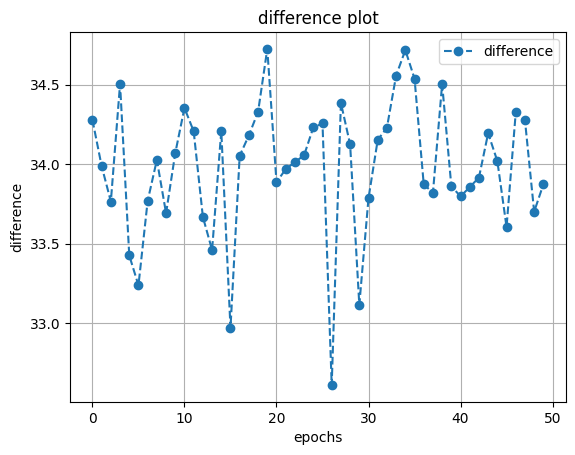

In [134]:
import numpy as np

plt.figure()
plt.plot(abs(np.array(history.history['loss']) - np.array(history.history['val_loss'])), label = 'difference', marker='o', linestyle='dashed')

plt.xlabel('epochs')
plt.ylabel('difference')
plt.title('difference plot')
plt.legend()
plt.grid(True)
plt.show()